# Credit Card Fraud Detection

> Goal: Detect whether a credit card transaction is fraud or not.

> Type: Binary Classification. (Fraud or Not Fraud)

In [1]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report, recall_score, f1_score,\
  precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
# Loading the dataset:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Shape of dataset:
df.shape

(284807, 31)

In [4]:
# Columns present in dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# Checking if there is any null value present:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
# Dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Dataset description:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


---
## Exploratory Data Analysis (EDA):

### 1. Univariate Analysis:


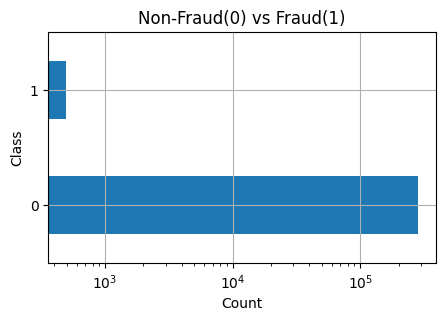

In [8]:
## Visualizing class distribution (Non-Fraud vs Fraud) using a bar chart

# Using Matplotlib:
plt.figure(figsize=(5,3))
df["Class"].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Class')
plt.xscale('log')
plt.title('Non-Fraud(0) vs Fraud(1)')
plt.grid()
plt.show()

# Using Seaborn:
# sns.countplot(x='Class', data=df)

The bar chart shows extreme `class imbalance`, with fraud transactions forming a very small proportion of the dataset

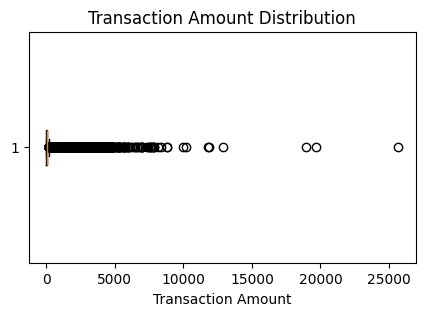

In [9]:
# Visualizing transaction amount distribution and outliers using a boxplot

plt.figure(figsize=(5,3))
plt.boxplot(df.Amount, orientation='horizontal')
plt.xlabel('Transaction Amount')
plt.title('Transaction Amount Distribution')
plt.show()

The boxplot shows a `highly right-skewed` distribution with numerous high-value outliers, indicating the presence of anomalous transactions.

### 2. Bivariate Analysis:


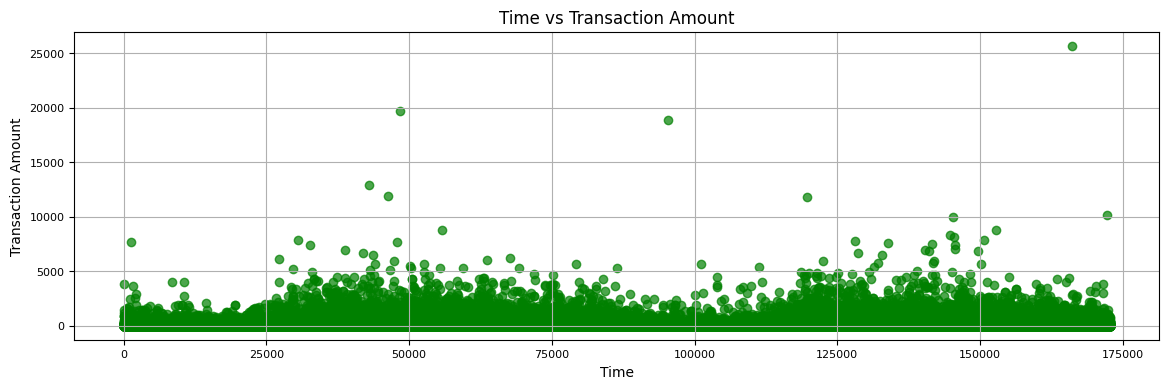

In [10]:
# Using scatter plot to show transaction amount variation over time

plt.figure(figsize=(14,4))
plt.scatter(df["Time"], df["Amount"], alpha=0.7, color='g')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.tick_params(axis='both', labelsize=8)
plt.title('Time vs Transaction Amount')
plt.grid()
plt.show()

The scatter plot shows that transaction amounts do not follow any clear pattern over time. High-value transactions appear randomly at different times, indicating that unusual transactions are not linked to specific time periods.

### 3. Correlation Heatmap:


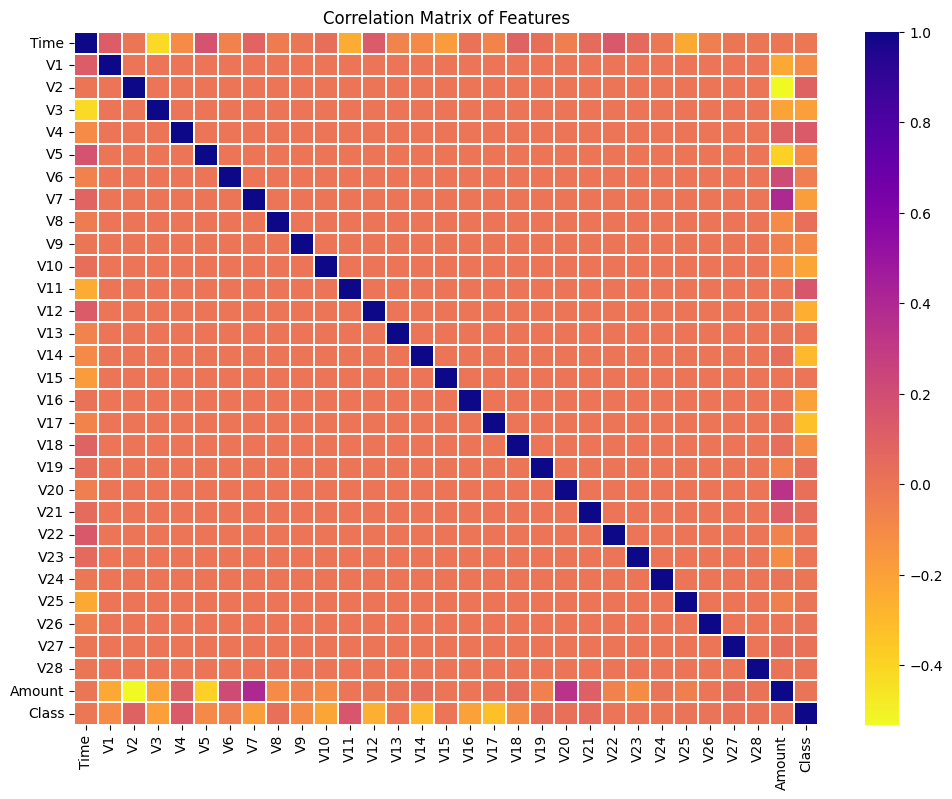

In [11]:
# Correlation heatmap to analyze relationships between features

plt.figure(figsize=(12,9))
corr = df.corr()
sns.heatmap(corr,
            cmap='plasma_r', fmt='.1f',
            cbar=True, linecolor='white',
            linewidth=0.03)
plt.title('Correlation Matrix of Features')
plt.show()

The correlation heatmap indicates that most features have near-zero correlation, suggesting there is low multicollinearity among features.



### 4. Visualization of PCA Components:



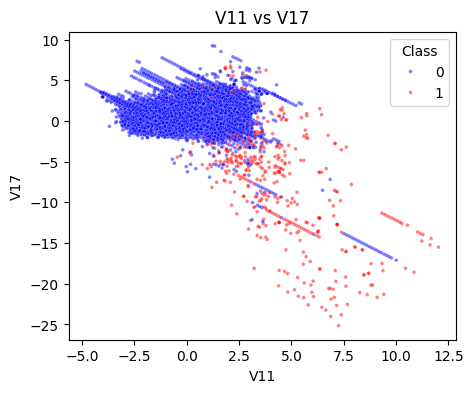

In [12]:
# Scatter plot showing class separation using PCA components V11 and V17

plt.figure(figsize=(5,4))
sns.scatterplot(
    data=df, x='V11', y='V17',
    hue='Class',
    palette={0:'blue', 1:'red'},
    s=7, alpha=0.5
)
plt.xlabel('V11')
plt.ylabel('V17')
plt.title("V11 vs V17")
plt.show()

The scatter plot shows some separation between fraud and non-fraud transactions using V11 and V17, indicating that these PCA components provide useful information for classification.

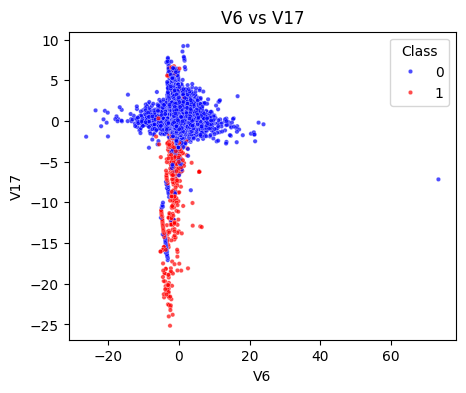

In [13]:
# Scatter plot showing class separation using PCA components V6 and V17

plt.figure(figsize=(5,4))
sns.scatterplot(
    data=df, x='V6', y='V17',
    hue='Class',
    palette={0:'blue', 1:'red'},
    s=10, alpha=0.7
)
plt.xlabel('V6')
plt.ylabel('V17')
plt.title("V6 vs V17")
plt.show()

The scatter plot shows clearer separation for fraud transactions using V6 and V17, suggesting that these PCA components are more effective in identifying fraud.

---
## Pre-processing:


### 1. Train/Test split:


In [14]:
# Separating features (X) and target variable (y)
random_state= 42

X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

A stratified train–test split is used to maintain the original class imbalance in both the training and testing sets.

In [16]:
# Shape of train and test sets:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [17]:
# Checking fraud class distribution in full, train, and test datasets
print("Total Fraud percentage in dataset: ",
      df['Class'].value_counts(normalize=True) *100)
print("Total Fraud percentage in train set: ",
      y_train.value_counts(normalize=True) *100)
print("Total Fraud percentage in test set: ",
      y_test.value_counts(normalize=True) *100)

Total Fraud percentage in dataset:  Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64
Total Fraud percentage in train set:  Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64
Total Fraud percentage in test set:  Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


The class distribution is consistent across the full, training, and test datasets, showing that stratification is correctly applied.

### 2. Scaling:

In [18]:
# Scaling Time and Amount features:
StandardScaler_obj = StandardScaler()
X_train[['Time', 'Amount']] = StandardScaler_obj.fit_transform(
    X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = StandardScaler_obj.transform(
    X_test[['Time', 'Amount']])

Since the V-features are PCA-transformed and already standardized, only the Time and Amount features are scaled using StandardScaler.

In [19]:
# After Scaling X_train:
print(X_train[['Amount', 'Time']].mean())
print(X_train[['Amount', 'Time']].std())

Amount   -2.020811e-17
Time     -1.407707e-16
dtype: float64
Amount    1.000002
Time      1.000002
dtype: float64


The mean is approximately 0, and the standard deviation is ~1, confirming that the data has been properly standardized.

In [20]:
# After Scaling X_test:

print(X_test[['Amount', 'Time']].mean())
print(X_test[['Amount', 'Time']].std())

Amount    0.003456
Time     -0.007500
dtype: float64
Amount    0.987933
Time      0.999960
dtype: float64


The test data follows a similar scale as the training data, confirming that the scaler was applied correctly without data leakage.

---
## 3. Baseline Model:

In [21]:
def evaluate_metrics(y_test, y_preds, y_pred_proba):
  """
  Compute evaluation metrics for imbalanced binary classification problems
  such as fraud detection.

  Threshold-based metrics (confusion matrix, recall, precision, F1-score)
  are computed using predicted class labels.
  ROC-AUC is computed using predicted probabilities for the positive class.
  """

  conf_matrix= confusion_matrix(y_test, y_preds)
  recall= recall_score(y_test, y_preds)
  precision= precision_score(y_test, y_preds)
  f1= f1_score(y_test, y_preds)
  roc_auc= roc_auc_score(y_test, y_pred_proba[:,1])

  return conf_matrix, recall, precision, f1, roc_auc

#### 3.1 : Logistic Regression :


In [22]:
# Fitting the Logistic Regression model on the training set
log_reg_model = LogisticRegression(class_weight='balanced',
                                   solver='liblinear',
                                   random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [23]:
# Making predictions on the test set
y_pred_lr = log_reg_model.predict(X_test)
y_pred_proba_lr = log_reg_model.predict_proba(X_test)

In [24]:
lr_conf_matrix, lr_recall, lr_prec, lr_f1, lr_roc_auc = evaluate_metrics(y_test, y_pred_lr, y_pred_proba_lr)
print("Confusion Matrix:\n", lr_conf_matrix)
print("Recall:", lr_recall)
print("Precision:", lr_prec)
print("F1 Score:", lr_f1)
print("ROC-AUC Score:", lr_roc_auc)

Confusion Matrix:
 [[55478  1386]
 [    8    90]]
Recall: 0.9183673469387755
Precision: 0.06097560975609756
F1 Score: 0.11435832274459974
ROC-AUC Score: 0.9720948047902334


**Summary:**

- Logistic Regression with class balancing achieves a `high recall`, suggests it successfully identifies most fraud transactions.
- However, the `low precision`, indicates a high number of false positives.
- The model shows strong `ROC-AUC` performance but needs improvement in precision.

#### 3.2 : SMOTE + Random Forest:


In [25]:
# SMOTE:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train)

SMOTE addresses class imbalance by generating synthetic minority-class samples, helping the model learn fraud patterns better and improving recall without removing majority-class data.

In [26]:
# Fitting the Random Forest model on the training set :
rf_model = RandomForestClassifier(random_state=42,
                                  n_estimators=200,
                                  max_depth=5,
                                  class_weight=None,
                                  n_jobs=-1)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [27]:
# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

In [28]:
rf_conf_matrix, rf_recall, rf_prec, rf_f1, rf_roc_auc = evaluate_metrics(y_test, y_pred_rf, y_pred_proba_rf)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Recall:", rf_recall)
print("Precision:", rf_prec)
print("F1 Score:", rf_f1)
print("ROC-AUC Score:", rf_roc_auc)

Confusion Matrix:
 [[56491   373]
 [   11    87]]
Recall: 0.8877551020408163
Precision: 0.1891304347826087
F1 Score: 0.3118279569892473
ROC-AUC Score: 0.9754509147496927


**Summary:**

- Random Forest model trained on SMOTE-balanced data achieved a `recall ~ 89%`, effectively identifying the majority of fraudulent transactions while missing only a limited number of fraud cases.
- Although `precision` was comparatively low due to class imbalance, this trade-off is acceptable.
- The model attained a high `ROC-AUC ~ 0.97`, indicates that the model separates fraud and non-fraud transactions very effectively and can be further improved by adjusting the decision threshold.

#### 3.3 XGBoost CLassifier:

In [29]:
# Initialize XGBoost with the correct hyperparameters
xgb_model = XGBClassifier(max_depth=4,
                          learning_rate=0.1,
                          n_estimators=300,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          eval_metric='auc',
                          random_state=42)

In [30]:
# Fitting the XGB Classifier model on the training set:
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
# Making prediction on test set:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

In [32]:
xgb_conf_matrix, xgb_recall, xgb_prec, xgb_f1, xgb_roc_auc = evaluate_metrics(y_test, y_pred_xgb, y_pred_proba_xgb)
print("Confusion Matrix:\n", xgb_conf_matrix)
print("Recall:", xgb_recall)
print("Precision:", xgb_prec)
print("F1 Score:", xgb_f1)
print("ROC-AUC Score:", xgb_roc_auc)

Confusion Matrix:
 [[56743   121]
 [   13    85]]
Recall: 0.8673469387755102
Precision: 0.41262135922330095
F1 Score: 0.5592105263157895
ROC-AUC Score: 0.9810327971931598


**Summary**:
- An XGBoost classifier trained on SMOTE-balanced data achieved a recall of 87% while significantly improving precision (~42%) compared to the Random Forest model, successfully detecting most fraudulent transactions.

- This improvement indicates a substantial reduction in false positives.

- The model achieved a high ROC-AUC of ~0.98, demonstrating excellent class separability.

- Overall, XGBoost provides a stronger balance between recall and precision compared to baseline models.

#### Decision Threshold Analysis:

In [33]:
# make sure we have a 1-D vector of fraud probabilities
probs = y_pred_proba_xgb
if probs.ndim == 2:
    probs = probs[:, 1]   # take column for class=1

thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.40]

results = []
for t in thresholds:
    preds = (probs >= t).astype(int)    # 1-D binary predictions
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    rec  = recall_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=0)
    f1   = f1_score(y_test, preds, zero_division=0)
    results.append({
        "threshold": t,
        "TP": int(tp), "FN": int(fn), "FP": int(fp), "TN": int(tn),
        "recall": round(rec,4), "precision": round(prec,4), "f1": round(f1,4)
    })

df = pd.DataFrame(results).set_index("threshold")
print(df)


           TP  FN    FP     TN  recall  precision      f1
threshold                                                
0.05       89   9  1234  55630  0.9082     0.0673  0.1253
0.10       88  10   722  56142  0.8980     0.1086  0.1938
0.15       88  10   484  56380  0.8980     0.1538  0.2627
0.20       87  11   358  56506  0.8878     0.1955  0.3204
0.25       87  11   277  56587  0.8878     0.2390  0.3766
0.30       87  11   231  56633  0.8878     0.2736  0.4183
0.40       85  13   157  56707  0.8673     0.3512  0.5000


### Final Threshold Selection

- Although a higher threshold (0.40) achieved the best F1-score, it resulted in a slight reduction in fraud recall.
- A threshold of **0.30** was selected as the final operating point because it preserves a high recall (~89%) while maintaining a reasonable precision.
- This choice reflects a business-driven decision where minimizing missed fraud cases is prioritized over maximizing a single metric such as F1-score.


Applying threshold:

In [34]:
# Making final predictions using a tuned threshold:
final_threshold =0.30
final_preds = (y_pred_proba_xgb[:,1] >= final_threshold).astype(int)
final_preds

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
xgb_f_conf_matrix, xgb_f_recall,xgb_f_prec, xgb_f_f1, xgb_f_roc_auc = evaluate_metrics(
    y_test, final_preds, y_pred_proba_xgb)
print("Confusion Matrix:\n", xgb_f_conf_matrix)
print("Recall:", xgb_f_recall)
print("Precision:", xgb_f_prec)
print("F1 Score:", xgb_f_f1)
print("ROC-AUC Score:", xgb_f_roc_auc)

Confusion Matrix:
 [[56633   231]
 [   11    87]]
Recall: 0.8877551020408163
Precision: 0.27358490566037735
F1 Score: 0.4182692307692308
ROC-AUC Score: 0.9810327971931598


> **Hyperparameters Tuning** defines the model’s learning capacity and performance.

> The **Decision Threshold** reflects business priorities

---
### Saving the artifacts:

In [36]:
# Save the StandardScaler
joblib.dump(StandardScaler_obj, "scaler.joblib")

# Save the trained XGBoost model:
joblib.dump(xgb_model, "final_xgb_model.joblib")

# Save the chosen operating threshold:
joblib.dump(0.30, "final_threshold.joblib")

['final_threshold.joblib']

---
### Loading artifacts in Deployment:

In [ ]:
scaler = joblib.load('scaler.joblib')
model = joblib.load('final_xgb_model.joblib')
threshold = joblib.load('final_threshold.joblib')

X_new_scaled = scaler.transform(X_new)
probs = model.predict_proba(X_new_scaled)[:, 1]
preds = (probs >= threshold).astype(int)

# NOTE:
# X_new represents new/unseen transaction data during deployment.
# X_new must have the same feature order and preprocessing as training data
# It is not available in this notebook and is shown here for inference illustration only.
# Can also use X_new = X_test.copy()

## **Final Summary:**

- This notebook presents an **end-to-end credit card fraud detection pipeline** for highly imbalanced transaction data, focusing on minimizing missed fraud, which is critical in real-world financial systems.

- The dataset contains PCA-transformed features (V1–V28) along with Time and Amount. Exploratory analysis highlights severe class imbalance and partial class separation in PCA, motivating the use of non-linear models.

- Data leakage is avoided in preprocessing pipeline by using a **stratified** train–test split, feature scaling for Time and Amount, and SMOTE on training data only.

- Logistic Regression is used as a baseline, while `XGBoost` is selected as the final model due to superior performance on imbalanced data.

- `Threshold tuning` is performed on predicted probabilities, and a threshold of **0.30** is chosen to balance recall and precision.


- <u>Final Performance:</u>
  - Model: XGBoost using threshold = 0.30
  - Recall: ~0.89
  - Precision: ~0.29
  - ROC-AUC: ~0.98


The final model, scaler, and threshold are saved, making the pipeline ready for deployment and integration.